# Converting audio into text


We will be using assembly ai api for audio to text translation

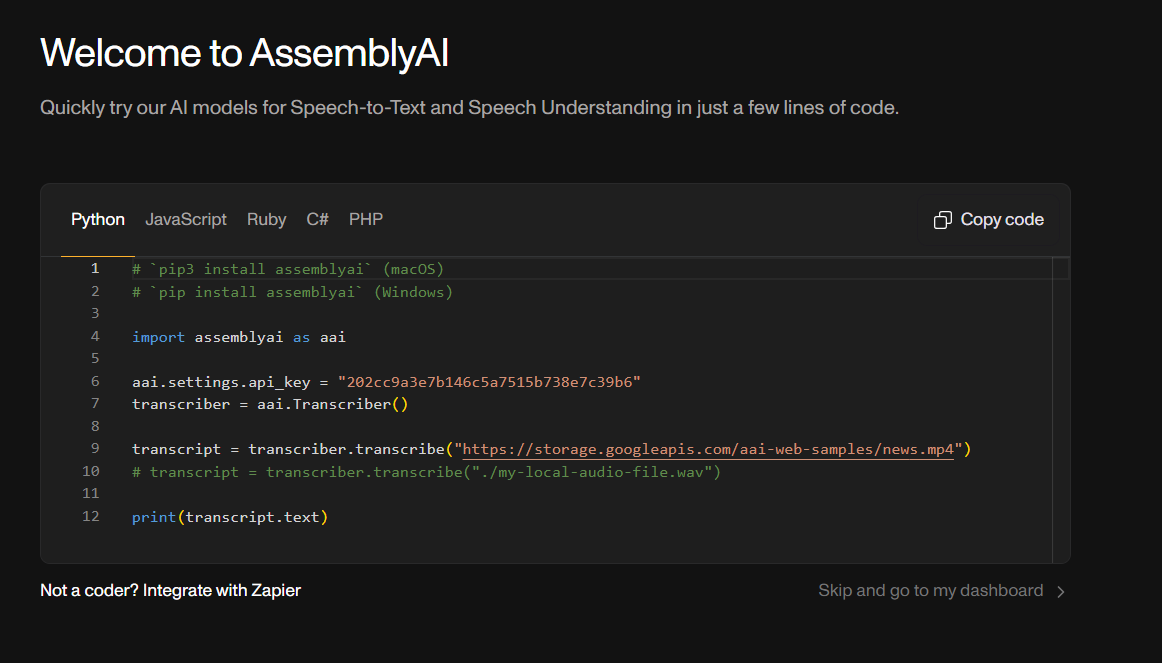

Before starting create a api_config.py file and add the api key there

In [152]:
API_KEY_ASSEMBLY_AI = '202cc9a3e7b146c5a7515b738e7c39b6'

Project is divided into four parts


> upload the file to assembly ai

> Start transcription

> Pulling to api to see transcription is done

> saving the transcription










In [153]:
import requests
import time

In [154]:
filename = '/content/drive/MyDrive/Audio_Dataset/Toronto emotional speech dataset/OAF_Fear/OAF_bar_fear.wav'

upload_endpoint = 'https://api.assemblyai.com/v2/upload'
transcript_endpoint = 'https://api.assemblyai.com/v2/transcript'
headers = {'authorization': API_KEY_ASSEMBLY_AI}

def upload(filename):
    def read_file(filename, chunck_size = 5242880):
      with open(filename, 'rb') as _file:
        while True:
          data = _file.read(chunck_size)
          if not data:
            break
          yield data

    upload_response = requests.post(url = upload_endpoint,
                          headers = headers,
                          data = read_file(filename))
    print(upload_response.json())
    audio_url = upload_response.json()['upload_url']
    return audio_url

we are posting the request to the url so we are giving upload_endpoint then the api key as headers and the data.

we are reading the file in chuncks(parts) because assembly ai reads the file in parts and we are doing it in 5MB chuncks.

The upload url in the output giving by (response.json()) is the location where our audio file is and after that using it we can start transcription.

In [155]:
def transcribe(audio_url):
  transcript_request = {'audio_url': audio_url}
  transcript_response = requests.post(url = transcript_endpoint, json = transcript_request, headers = headers)
  # print(response.json())
  transcript_id = transcript_response.json()['id']
  return transcript_id

Now the we can use transcript id to check the status of the transcription done.

In [156]:
def poll(transcript_id):
  polling_endpoint = transcript_endpoint + '/' + transcript_id
  polling_response = requests.get(url = polling_endpoint, headers=headers).json()
  return polling_response

In [157]:
def get_transcription_result_url(audio_url):
  transcript_id = transcribe(audio_url)
  while True:
    data = poll(transcript_id=transcript_id)
    if data['status'] == 'completed':
      return data['text'], None
      break
    elif data['status'] == 'error':
      return data['text'], f"Transcription failed: {data['error']}"

    else:
      time.sleep(3)


now creating a transcript


In [158]:
def save_transcript(audio_url):
  data, error = get_transcription_result_url(audio_url)
  if data:
    text_filename = filename + '.txt'
    with open(text_filename, 'w') as f:
      f.write(data)
    print('Transcription is saved')
  else:
    print('OOPS! Transcription is not available because of' , error)

In [159]:
audio_url = upload(filename)
save_transcript(audio_url)

{'upload_url': 'https://cdn.assemblyai.com/upload/3e8fb7e5-207a-45ba-877c-7ed3d647da20'}
Transcription is saved
